In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# jax
import jax.numpy as jnp
from jax import random
import time

# collocation
import sys
import os
p_ = os.path.abspath(os.path.join('..', '00_utils'))
if p_ not in sys.path:
    sys.path.append(p_)
    
import collocation_obj
import importlib

In [20]:
importlib.reload(collocation_obj)
Collocation = collocation_obj.Collocation

In [10]:
def f(x):
    return x * np.sin(x)

def df(x):
    return np.sin(x) + x*np.cos(x)

eval_pt = np.linspace(0, 2*np.pi, 100)
f_values = f(eval_pt)
df_analytical = df(eval_pt)
df_numerical = np.gradient(f_values, eval_pt)
error = np.linalg.norm(df_analytical - df_numerical)

print("Maximum error:", np.max(error))

Maximum error: 0.09501322546375748


In [12]:
gl_collocation = Collocation(32, 0, 6, 'gauss_legendre')
nodes = gl_collocation.compute_nodes()

nodes_filtered = []
for i in range(len(nodes)):
    if i % 2 == 0:
        nodes_filtered.append(nodes[i])

D = gl_collocation.compute_derivative_matrix(nodes_filtered)

dy_dt = []
for i in range(len(nodes_filtered)):
    dy_dt.append(D[i] @ f(nodes))

In [16]:
gl_collocation_16 = Collocation(16, 0, 6, 'gauss_legendre')

nodes_16 = gl_collocation_16.compute_nodes()
D_16 = gl_collocation_16.compute_derivative_matrix()

dy_dt_16 = []
nodes_filtered_16 = []
for i in range(len(nodes_16)):
    nodes_filtered_16.append(nodes_16[i])
    dy_dt_16.append(D_16[i] @ f(nodes_16))

In [19]:
nodes_16

array([0.0317972 , 0.16627493, 0.40310639, 0.73378677, 1.14637127,
       1.62594967, 2.15518935, 2.71496247, 3.28503753, 3.84481065,
       4.37405033, 4.85362873, 5.26621323, 5.59689361, 5.83372507,
       5.9682028 ])

In [18]:
nodes_filtered

[0.00820841445155529,
 0.10571323323748083,
 0.3110365327018434,
 0.6165486120961725,
 1.0108671992093543,
 1.4793002732033116,
 2.004394193153617,
 2.5665841152516107,
 3.1449229970632153,
 3.717862086756411,
 4.264053828391907,
 4.763147271722287,
 5.196546356220869,
 5.548102841197711,
 5.804718227813219,
 5.956834534635805]

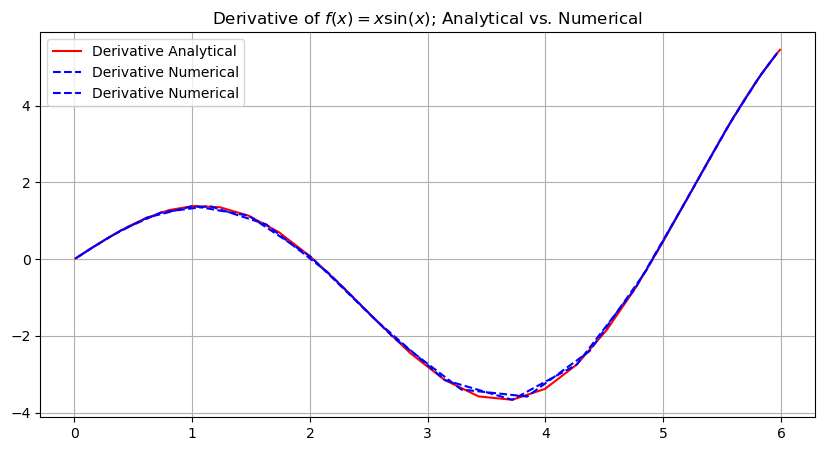

Maximum error: 0.09501322546375748


In [17]:
plt.figure(figsize=(10, 5))
plt.plot(nodes, df(nodes), color='red', label=f'Derivative Analytical')
plt.plot(nodes_filtered, dy_dt, '--', color='blue', label=f'Derivative Numerical')
plt.plot(nodes_16, dy_dt_16, '--', color='blue', label=f'Derivative Numerical')
plt.title('Derivative of $f(x) = x \sin(x)$; Analytical vs. Numerical')
plt.grid()
plt.legend()
plt.show();

# error = np.mean((df(nodes) - dy_dt)**2)

print("Maximum error:", np.max(error))